In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 5s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [6]:
x_train[0].shape

(28, 28)

each sample is a 28x28 image 

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

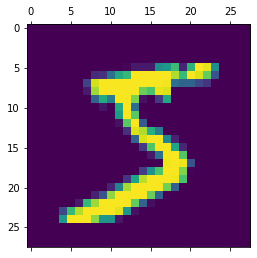

In [8]:
plt.matshow(x_train[0])

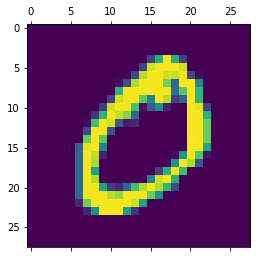

In [9]:
plt.matshow(x_train[1])

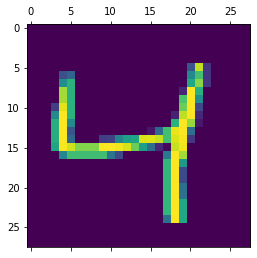

In [10]:
plt.matshow(x_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
x_train.shape

(60000, 28, 28)

first dimension is the number of samples and the next two represents each sample(image)

In [20]:
x_train = x_train / 255   #also we are scaling our values in dataset bw 0 - 1 so that our model can perform well
x_test = x_test / 255

In [21]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

so we converted the two dimensional matrix that represented the image into a 1 d array

In [23]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [25]:
model = keras.Sequential([   #sequential cause the layers are stacked up and in our case we only have two layers input and output
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid') #Dense means every neuron is connected to each other
])             # 10  is the output layer shape , input shape is 784 as we earlier converted our images , activation function is sigmoid 
               #which will basically give values bw 0-1
model.compile(
    optimizer = 'adam',  #this will help our model to reach maxima in optimum way
    loss = 'sparse_categorical_crossentropy', #sparse means digits which we are using here , categorical because we are categorising here digits
    metrics = ['accuracy']   #accuracy is same of ml
)

model.fit(x_train_flattened,y_train,epochs = 5) #epochs is no of iterations our model has to perform and with each iteration the accuracy will increase

Epoch 1/5
1875/1875 [==============================] - 2s 667us/step - loss: 0.4753 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 1s 665us/step - loss: 0.3045 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 641us/step - loss: 0.2836 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 1s 651us/step - loss: 0.2738 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 1s 677us/step - loss: 0.2666 - accuracy: 0.9249


In [26]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 655us/step - loss: 0.2681 - accuracy: 0.9256


[0.26810240745544434, 0.925599992275238]

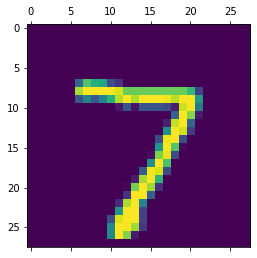

In [27]:
plt.matshow(x_test[0])

In [28]:
y_predicted = model.predict(x_test_flattened)

In [29]:
y_predicted[0]

array([3.2168478e-02, 2.9344113e-07, 4.5236766e-02, 9.4975567e-01,
       2.1945536e-03, 9.9474192e-02, 1.6415761e-06, 9.9985147e-01,
       1.1505571e-01, 6.5541905e-01], dtype=float32)

these are all the scores given for each of the elements of our output layers .... it will consider the max score as the predicted ans

In [31]:
np.argmax(y_predicted[0])

7

so 7 had the highest score and so it reutrned it as the answer

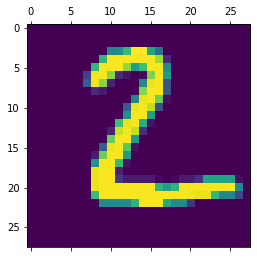

In [32]:
plt.matshow(x_test[1])

In [33]:
y_predicted[1]

array([2.7889505e-01, 3.8366914e-03, 9.9914348e-01, 3.2820714e-01,
       6.0701283e-10, 8.1041330e-01, 9.3237501e-01, 7.8436097e-13,
       1.6977066e-01, 3.8636756e-09], dtype=float32)

In [34]:
np.argmax(y_predicted[1])

2

now we want to plot a confusion matrix for our model but with the current y_predicted we cant 

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
y_predicted[:5]

array([[3.21684778e-02, 2.93441133e-07, 4.52367663e-02, 9.49755669e-01,
        2.19455361e-03, 9.94741917e-02, 1.64157609e-06, 9.99851465e-01,
        1.15055710e-01, 6.55419052e-01],
       [2.78895050e-01, 3.83669138e-03, 9.99143481e-01, 3.28207135e-01,
        6.07012829e-10, 8.10413301e-01, 9.32375014e-01, 7.84360966e-13,
        1.69770658e-01, 3.86367560e-09],
       [4.03851271e-04, 9.93946552e-01, 6.13366187e-01, 2.75643766e-01,
        2.24402249e-02, 9.71910059e-02, 2.07058787e-01, 1.37480348e-01,
        3.60702574e-01, 3.90322804e-02],
       [9.99302864e-01, 2.06177599e-08, 3.70885730e-02, 5.04136086e-03,
        4.04584789e-05, 6.30805194e-02, 1.12481982e-01, 2.87147164e-02,
        2.39910185e-02, 2.13223100e-02],
       [3.21336985e-02, 3.95530078e-05, 1.10580534e-01, 2.93353200e-03,
        9.88212705e-01, 1.11599863e-02, 1.50712371e-01, 3.06935430e-01,
        2.67393053e-01, 6.70112014e-01]], dtype=float32)

so we have to convert y_predicted into concrete labels i.e. we gotta run np.argmax on every y_predicted array

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [39]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

now we can use them for our confusion matrix

In [40]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    1,    0,    5,    9,    3,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,    9,  908,   18,   10,    4,   13,   12,   48,    2],
       [   2,    0,   17,  927,    0,   18,    3,   14,   22,    7],
       [   1,    1,    2,    1,  915,    0,   13,    4,   10,   35],
       [   9,    3,    1,   37,    9,  766,   19,   10,   31,    7],
       [  10,    3,    3,    1,    7,    8,  922,    2,    2,    0],
       [   1,    6,   21,    5,    5,    0,    0,  965,    3,   22],
       [   7,   10,    5,   20,    8,   23,   10,   14,  872,    5],
       [  11,    7,    1,   12,   27,    5,    0,   35,    7,  904]])>

Text(69.0, 0.5, 'Truth')

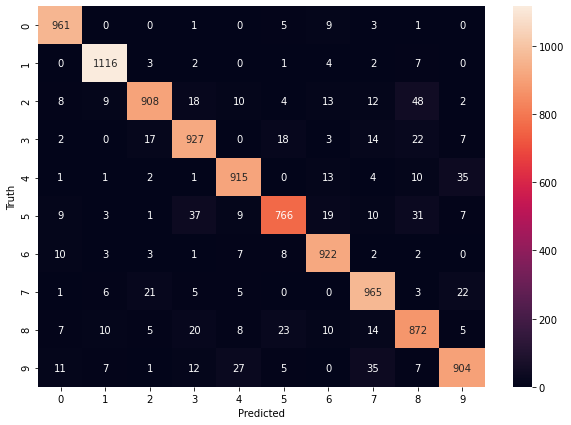

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**now we will see how accuracy improves on using a hidden layer in our model**

In [43]:
model = keras.Sequential([  
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'), #adding a hidden  layer 
    keras.layers.Dense(10,activation='sigmoid')       #this dont need a input size it will adjust acc to upper layer
])

model.compile(
    optimizer = 'adam',  
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']   
)

model.fit(x_train_flattened,y_train,epochs = 5) 

Epoch 1/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.2668 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.1220 - accuracy: 0.9641
Epoch 3/5
1875/1875 [==============================] - 2s 979us/step - loss: 0.0858 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 2s 933us/step - loss: 0.0643 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 2s 905us/step - loss: 0.0513 - accuracy: 0.9843


In [44]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 722us/step - loss: 0.0812 - accuracy: 0.9754


[0.0812152549624443, 0.9753999710083008]

so we see how accuracy increased from 92 to 97.5

Text(69.0, 0.5, 'Truth')

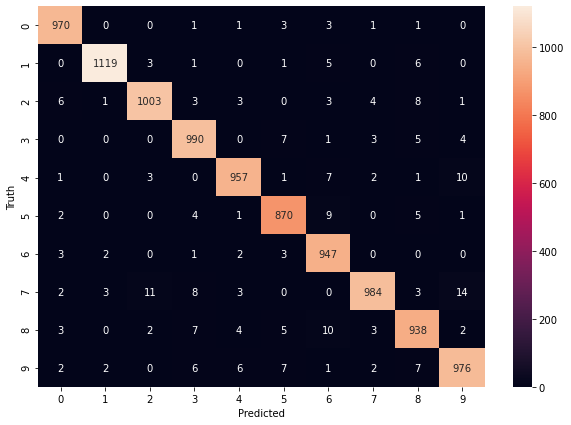

In [45]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

so now as we can see the values in diagonal increased and outside that decreased

**now if you dont want to flatten your data set manually there is another direct way of doing that**

In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation='sigmoid')      
])

model.compile(
    optimizer = 'adam',  
    loss = 'sparse_categorical_crossentropy', 
    metrics = ['accuracy']   
)

model.fit(x_train,y_train,epochs = 10)  #we can directly supply x_train

Epoch 1/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.2750 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1278 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.0898 - accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 2s 910us/step - loss: 0.0686 - accuracy: 0.9795
Epoch 5/10
1875/1875 [==============================] - 2s 907us/step - loss: 0.0531 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.0439 - accuracy: 0.9863
Epoch 7/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.0344 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 2s 905us/step - loss: 0.0286 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0252 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 2s 966us/

In [47]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 772us/step - loss: 0.0965 - accuracy: 0.9734


[0.0965336337685585, 0.9733999967575073]